# MODEL DEVELOPMENT

In [6]:
#install specific version of libraries 
#! mamba install pandas==1.3.3-y
#! mamba install numpy=1.21.2-y
#! mamba install sklearn=0.20.1-y

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#input data files
pathfile1="C:\Jupyter\Cab_Data.csv"
pathfile2="C:\Jupyter\City.csv"
pathfile3="C:\Jupyter\Customer_ID.csv"
pathfile4="C:\Jupyter\Transaction_ID.csv"

CabData = pd.read_csv('\Jupyter\Cab_Data.csv')
City = pd.read_csv('C:\Jupyter\City.csv')
CustomerID = pd.read_csv('C:\Jupyter\Customer_ID.csv')
TransactionID = pd.read_csv('C:\Jupyter\Transaction_ID.csv')

MasterData = CabData.merge(TransactionID, on= 'Transaction ID').merge(CustomerID, on ='Customer ID').merge(City, on = 'City')
missing_value = 0
MasterData.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
5,10324737,5/4/2018,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701"
6,10395626,10/27/2018,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,"814,885","24,701"
7,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
8,10079404,9/21/2016,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701"
9,10186994,6/23/2017,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,"814,885","24,701"


In [9]:
#replacing ',' with '_' in column names 

for column in MasterData.columns:
    if ' ' in column:
        MasterData = MasterData.rename(columns={column:column.replace(' ','_')})
        
for column in ["Population","Users"] :
    
        MasterData[column] = MasterData[column].str.replace(',','')
        
MasterData.head(10)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701
5,10324737,5/4/2018,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885,24701
6,10395626,10/27/2018,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,814885,24701
7,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
8,10079404,9/21/2016,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701
9,10186994,6/23/2017,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885,24701


In [10]:
# formatting of columns in appropriate format

MasterData['Date_of_Travel'] = pd.to_datetime(MasterData['Date_of_Travel'])

for column in ["Company", "City" , "Payment_Mode" , "Gender" ] :
    
        MasterData[column] = MasterData[column].astype('category')
        
        
for column in ["Population", "Users" ] :
    
        MasterData[column] = MasterData[column].astype('int64')
        
print("\nFeature's datatypes\n\n{}".format(MasterData.dtypes))


Feature's datatypes

Transaction_ID                 int64
Date_of_Travel        datetime64[ns]
Company                     category
City                        category
KM_Travelled                 float64
Price_Charged                float64
Cost_of_Trip                 float64
Customer_ID                    int64
Payment_Mode                category
Gender                      category
Age                            int64
Income_(USD/Month)             int64
Population                     int64
Users                          int64
dtype: object


In [61]:
# Normalizing the Master Data into two datasets 'Pink Cab' & 'Yellow Cab'
Pink_MasterData = MasterData [MasterData['Company'] == 'Pink Cab'] 
Yellow_MasterData = MasterData [MasterData['Company'] == 'Yellow Cab']
selected_columns = ['KM_Travelled','Price_Charged','Cost_of_Trip', 'Age' ,'Income_(USD/Month)', 'Population' , 'Users']

## Muliple Linear Regression

#### Linear Function

       𝑌:Price_Charged
       𝑋_1:KM_Travelled
       𝑋_2:Cost_of_Trip
       𝑋_3:Users
   

       𝑎:𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡
       𝑏_1:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 KM_Travelled
       𝑏_2:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 Cost_of_Trip
       𝑏_3:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 Users


#### The equation is given by:
      
      𝑌ℎ𝑎𝑡=𝑎+𝑏_1𝑋_1+𝑏_2𝑋_2+𝑏_3𝑋_3+𝑏_4𝑋_4

In [55]:
df = MasterData[['KM_Travelled','Cost_of_Trip','Users']]
df.corr()

,KM_Travelled,Cost_of_Trip,Users
KM_Travelled,1.000000,0.981848,-0.000428
Cost_of_Trip,0.981848,1.000000,0.023628
Users,-0.000428,0.023628,1.000000


#### From the Exploratory Data Analysis we know that other good predictors of Margin could be:

        KM_Travelled
        Price_Charged
        Cost_of_Trip
        Users
Develop a model using these variables as the predictor variables.

In [12]:
from sklearn.linear_model import LinearRegression

In [44]:
Z1 = Pink_MasterData[['KM_Travelled', 'Price_Charged', 'Cost_of_Trip', 'Users']]
Z2 = Yellow_MasterData[['KM_Travelled', 'Price_Charged', 'Cost_of_Trip', 'Users']]

In [54]:
lin_reg_PinkCab = LinearRegression()
lin_reg_YellowCab = LinearRegression()

In [55]:
lin_reg_PinkCab.fit(Z1, Pink_MasterData['Price_Charged'])
lin_reg_YellowCab.fit(Z2, Yellow_MasterData['Price_Charged'])

LinearRegression()

In [56]:
# Value of the intercepts
lin_reg_PinkCab.intercept_
lin_reg_YellowCab.intercept_

-2.2509993868879974e-11

In [17]:
# Value of the coefficients
lin_reg_PinkCab.coef_
lin_reg_YellowCab.coef_

array([-4.85362452e-13,  1.00000000e+00, -1.18517461e-15,  1.27447984e-16])

## Model Evaluation using Visulization

In [18]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

### Regression Plot

C:\Users\innam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 1703.874)

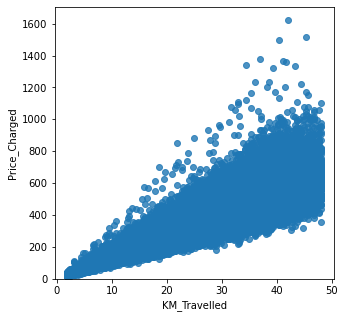

In [19]:
width = 5
height = 5
plt.figure(figsize=(width, height))
sns.regplot('KM_Travelled','Price_Charged', Pink_MasterData)
plt.ylim(0,)

C:\Users\innam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 2149.3950000000004)

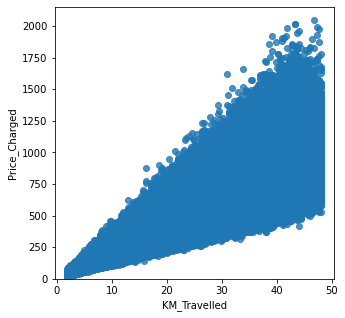

In [22]:
width = 5
height = 5
plt.figure(figsize=(width, height))
sns.regplot('KM_Travelled','Price_Charged', Yellow_MasterData)
plt.ylim(0,)

In [23]:
# The variable "Price_Charged" has a stronger correlation with "Margins1", 

Pink_MasterData[["KM_Travelled","Price_Charged"]].corr()
Yellow_MasterData[["KM_Travelled","Price_Charged"]].corr()

,KM_Travelled,Price_Charged
KM_Travelled,1.000000,0.859709
Price_Charged,0.859709,1.000000


### Residual Plot

C:\Users\innam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


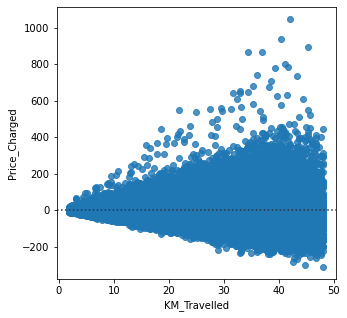

In [24]:
width = 5
height = 5
plt.figure(figsize=(width, height))
sns.residplot("KM_Travelled","Price_Charged", Pink_MasterData)
plt.show()

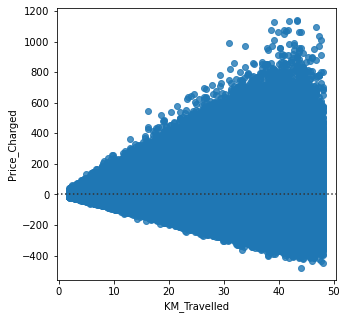

In [25]:
width = 5
height = 5
plt.figure(figsize=(width, height))
sns.residplot("KM_Travelled","Price_Charged", Yellow_MasterData)
plt.show()

#### We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

In [58]:
Y1_hat = lin_reg_PinkCab.predict(Z1)
Y2_hat = lin_reg_YellowCab.predict(Z2)

C:\Users\innam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


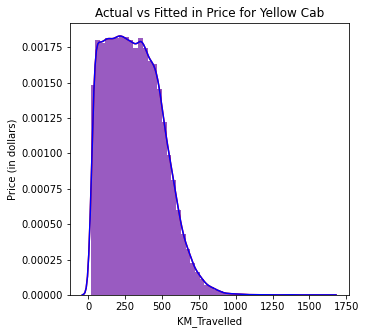

In [82]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(Pink_MasterData['Price_Charged'], color="r", label="Actual Value")
sns.distplot(Y1_hat, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted in Price for Yellow Cab')
plt.ylabel('Price (in dollars)')
plt.xlabel('KM_Travelled')

plt.show()
plt.close()

C:\Users\innam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\innam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


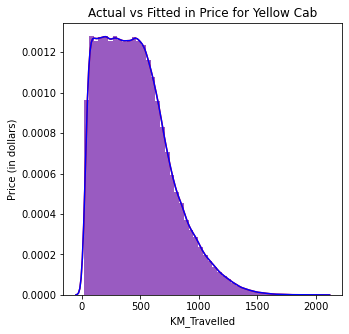

In [78]:
plt.figure(figsize=(width, height))


ax2 = sns.distplot(Yellow_MasterData['Price_Charged'], color="r", label="Actual Value")
sns.distplot(Y2_hat, color="b", label="Fitted Values" , ax=ax2)


plt.title('Actual vs Fitted in Price for Yellow Cab')
plt.ylabel('Price (in dollars)')
plt.xlabel('KM_Travelled')

plt.show()
plt.close()

In [77]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    
 x_new = np.linspace(15, 55, 100)
 y_new = model(x_new)

 plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
 plt.title('Polynomial Fit with Matplotlib for Price ~ KM travelled')
 ax = plt.gca()
 ax.set_facecolor((0.898, 0.898, 0.898))
 fig = plt.gcf()
 plt.xlabel('KM Travelled')
 plt.ylabel('Price Charged')

 plt.show()
 plt.close()

In [30]:

### Creating polynomial of the 4th order (cubic)
x1 = Pink_MasterData['KM_Travelled']
y1 = Pink_MasterData['Price_Charged']
x2= Yellow_MasterData['KM_Travelled']
y2= Yellow_MasterData['Price_Charged']


            4            3          2
-2.954e-05 x + 0.002586 x - 0.0703 x + 14.41 x - 1.59


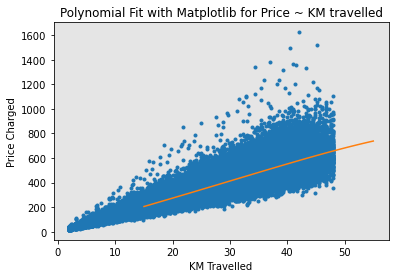

In [31]:
f1 = np.polyfit(x1,y1,4)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x1,y1,'KM_Travelled')

            4            3          2
-2.954e-05 x + 0.002586 x - 0.0703 x + 14.41 x - 1.59


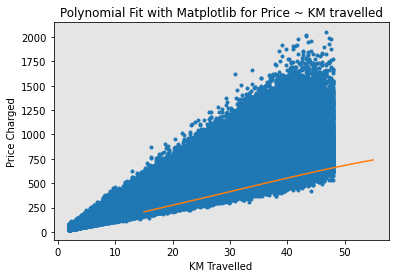

In [87]:
f2 = np.polyfit(x2,y2,4)
p2 = np.poly1d(f1)
print(p2)
PlotPolly(p2,x2,y2,'KM_Travelled')

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [34]:
Z1_pr=pr.fit_transform(Z1)


In [35]:
Z2_pr=pr.fit_transform(Z2)

## Pipeline

#### Creating a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [104]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [105]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [99]:
# converting into float
Z1 = Z1.astype(float)
pipe.fit(Z1,y1)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [102]:
Z2 = Z2.astype(float)
pipe.fit(Z2,y2)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [100]:
y1pipe=pipe.predict(Z1)
y1pipe[0:4]

array([370.95, 358.52, 167.03, 125.2 ])

In [101]:
y2pipe=pipe.predict(Z2)
y2pipe[0:4]

array([598.7 , 792.05, 721.1 , 138.4 ])

## Measures for InSample Evaluation

## Multiple Linear Regression

In [83]:
# Calculating squared R

# fit the model 
lin_reg_PinkCab.fit(Z1, Pink_MasterData['Price_Charged'])
# Find the R^2
print('The R-square is: ', lin_reg_PinkCab.score(Z1, Pink_MasterData['Price_Charged']))

The R-square is:  1.0


In [108]:

# fit the model 
lm.fit(Z2, Yellow_MasterData['Price_Charged'])
# Find the R^2
print('The R-square is: ', lm.score(Z2, Yellow_MasterData['Price_Charged']))

The R-square is:  1.0


In [114]:
from sklearn.metrics import mean_squared_error

In [117]:
mse = mean_squared_error(Pink_MasterData['Price_Charged'], Y1_hat)
print('The mean square error of price and predicted value of Pink Cab is: ', mse)

The mean square error of price and predicted value is:  79911.61780138176


In [118]:
mse = mean_squared_error(Yellow_MasterData['Price_Charged'], Y2_hat)
print('The mean square error of price and predicted value of Yellow Cab is: ', mse)

The mean square error of price and predicted value is:  115179.59717985174


In [119]:
Y1_predict_multifit = lm.predict(Z1)
print('The mean square error of price and predicted value using multifit of Pink Cab is: ', \
      mean_squared_error(Pink_MasterData['Price_Charged'], Y1_predict_multifit))

The mean square error of price and predicted value using multifit is:  2.4871138927531883e-22


In [120]:
Y2_predict_multifit = lm.predict(Z2)
print('The mean square error of price and predicted value using multifit of Yellow Cab is: ', \
      mean_squared_error(Yellow_MasterData['Price_Charged'], Y2_predict_multifit))

The mean square error of price and predicted value using multifit is:  2.368639506185586e-22


## Polynomial fit

In [95]:
from sklearn.metrics import r2_score
r_squared = r2_score(y1, x1)
print('The R-square value is: ', r_squared)

The R-square value is:  -2.3882009909853803


In [96]:
from sklearn.metrics import r2_score
r_squared = r2_score(y2, x2)
print('The R-square value is: ', r_squared)

The R-square value is:  -2.210529065845259


In [98]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Pink_MasterData['Price_Charged'], x1)

112224.09392802588

In [99]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Yellow_MasterData['Price_Charged'], x2)

267007.7523186248

## Multiple Linear Regression (MLR) vs. Polynomial Fit

### Pink Cab & Yellow Cab

     MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
     R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

#### The Multiple Linear Regression model is the best model to be able to predict price from our dataset.